In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Import Spotify Credentials
from config import CLIENT_ID
from config import CLIENT_SECRET

In [2]:
# Top 10 Artists Streamed on Spotify in the United States as of January 17th - Artist ID numbers

#1. Taylor Swift - https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02?si=28979011a2f446fb

#2. Drake - https://open.spotify.com/artist/3TVXtAsR1Inutravj472S9r4?si=c036ec885a6c4ab7

#3. Travis Scott - https://open.spotify.com/artist/0Y5tJX1MQlPlqiwlOH1tJY?si=13b2ea9ddc304c14

#4. Zach Bryan - https://open.spotify.com/artist/40ZNYROS4zLfyyBSs2PGe2?si=db0c9492a4a44e5c

#5. Kanye West - https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x?si=14d9933251a04f4e

#6. The Weeknd - https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ?si=7fd262759d3d453f

#7. Morgan Wallen - https://open.spotify.com/artist/4oUHIQIBe0LHzYfvXNW4QM?si=7c693b6829d04717

#8. 21 Savage - https://open.spotify.com/artist/1URnnhqYAYcrqrcwql10ft?si=f620ac02e71c485e

#9. Bad Bunny - https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X?si=aad3dd7099f742bf

#10. Future - https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i?si=876369688ab64a7d

In [3]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from config import CLIENT_ID
from config import CLIENT_SECRET

# Authenticate Spotify credentials and connect to Spotify API with Spotipy library
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Retrieve audio features for a specific track
track_id = '1BxfuPKGuaTgP7aM0Bbdwr'
audio_features = sp.audio_features([track_id])

# Print audio features
print(json.dumps(audio_features, indent=4, sort_keys=True))

[
    {
        "acousticness": 0.117,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/1BxfuPKGuaTgP7aM0Bbdwr",
        "danceability": 0.552,
        "duration_ms": 178427,
        "energy": 0.702,
        "id": "1BxfuPKGuaTgP7aM0Bbdwr",
        "instrumentalness": 2.06e-05,
        "key": 9,
        "liveness": 0.105,
        "loudness": -5.707,
        "mode": 1,
        "speechiness": 0.157,
        "tempo": 169.994,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/1BxfuPKGuaTgP7aM0Bbdwr",
        "type": "audio_features",
        "uri": "spotify:track:1BxfuPKGuaTgP7aM0Bbdwr",
        "valence": 0.564
    }
]


In [4]:
# Taylor Swift

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
swift_track_uri=[]
swift_track_name= []
swift_track_pop=[]
swift_artist_name=[]

# Create artist variable using unique URI ID 
swift_uri='spotify:artist:06HL4z0CvFAxyc27GXpf02'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
swift_results = sp.artist_top_tracks(swift_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in swift_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    swift_track_uri.append(track['uri'])
    swift_track_name.append(track['name'])
    swift_track_pop.append(track['popularity'])
    swift_artist_name.append(track['artists'][0]['name'])   

# Retrieve audio features from artist's top tracks
swiftdata=sp.audio_features(tracks=swift_track_uri)

# Slicing indexes so they are the same length as other audio features
swift_track_name = swift_track_name[0:9]
swift_track_pop= swift_track_pop[0:9]
swift_artist_name = swift_artist_name[0:9]

# Create empty lists to populate values 
swift_tracks_acousticness=[]
swift_tracks_tempo=[]
swift_tracks_uri=[]
swift_tracks_energy=[]
swift_tracks_loudness=[]
swift_tracks_speechiness=[]
swift_tracks_danceability=[]
swift_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for swift in range(len(swiftdata)-1):
# Append values to empty lists above   
    swift_tracks_acousticness.append(swiftdata[swift]['acousticness'])
    swift_tracks_tempo.append(swiftdata[swift]['tempo'])
    swift_tracks_uri.append(swiftdata[swift]['uri'])
    swift_tracks_energy.append(swiftdata[swift]['energy'])
    swift_tracks_loudness.append(swiftdata[swift]['loudness'])
    swift_tracks_speechiness.append(swiftdata[swift]['speechiness'])
    swift_tracks_danceability.append(swiftdata[swift]['danceability'])
    swift_tracks_valence.append(swiftdata[swift]['valence'])

# Create DataFrame displaying values for each audio feature column
swiftdata_df=pd.DataFrame({
    'uri':swift_tracks_uri,
    'artist': swift_artist_name, 
    'track':swift_track_name,
    'acousticness':swift_tracks_acousticness,
    'tempo': swift_tracks_tempo,
    'energy':swift_tracks_energy,
    'loudness': swift_tracks_loudness,
    'speechiness':swift_tracks_speechiness,
    'danceability':swift_tracks_danceability,
    'popularity': swift_track_pop,
    'valence': swift_tracks_valence
    })
swiftdata_df

Cruel Summer Taylor Swift
spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
Is It Over Now? (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:1Iq8oo9XkmmvCQiGOfORiz
Anti-Hero Taylor Swift
spotify:track:0V3wPSX9ygBnCm8psDIegu
Lover Taylor Swift
spotify:track:1dGr1c8CrMLDpV6mPbImSI
You’re Losing Me (From The Vault) Taylor Swift
spotify:track:3CWq0pAKKTWb0K4yiglDc4
cardigan Taylor Swift
spotify:track:4R2kfaDFhslZEMJqAFNpdd
Don’t Blame Me Taylor Swift
spotify:track:1R0a2iXumgCiFb7HEZ7gUE
august Taylor Swift
spotify:track:3hUxzQpSfdDqwM3ZTFQY0K
Now That We Don't Talk (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:5KD6AEm19QnMbfWpfoOHMl
"Slut!" (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:71BqAINEnezjQfxE4VuJfq


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,0.1170,169.994,0.702,-5.707,0.1570,0.552,99,0.5640
1,spotify:track:1Iq8oo9XkmmvCQiGOfORiz,Taylor Swift,Is It Over Now? (Taylor's Version) (From The V...,0.0504,100.012,0.658,-7.346,0.0360,0.596,93,0.1760
2,spotify:track:0V3wPSX9ygBnCm8psDIegu,Taylor Swift,Anti-Hero,0.1300,97.008,0.643,-6.571,0.0519,0.637,92,0.5330
3,spotify:track:1dGr1c8CrMLDpV6mPbImSI,Taylor Swift,Lover,0.4920,68.534,0.543,-7.582,0.0919,0.359,92,0.4530
4,spotify:track:3CWq0pAKKTWb0K4yiglDc4,Taylor Swift,You’re Losing Me (From The Vault),0.5290,102.984,0.391,-13.767,0.0520,0.747,92,0.1950
5,spotify:track:4R2kfaDFhslZEMJqAFNpdd,Taylor Swift,cardigan,0.5370,130.033,0.581,-8.588,0.0424,0.613,90,0.5510
6,spotify:track:1R0a2iXumgCiFb7HEZ7gUE,Taylor Swift,Don’t Blame Me,0.1060,135.917,0.534,-6.719,0.0386,0.615,91,0.1930
7,spotify:track:3hUxzQpSfdDqwM3ZTFQY0K,Taylor Swift,august,0.5380,89.937,0.623,-9.208,0.0331,0.532,90,0.4030
8,spotify:track:5KD6AEm19QnMbfWpfoOHMl,Taylor Swift,Now That We Don't Talk (Taylor's Version) (Fro...,0.1860,109.994,0.512,-9.319,0.0338,0.793,89,0.0662


In [5]:
# Drake

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
drake_tracks_uri=[]
drake_tracks_name= []
drake_track_pop=[]
drake_artist_name=[]

# Create artist variable using unique URI ID 
drake_uri='spotify:artist:3TVXtAsR1Inumwj472S9r4'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
drake_results = sp.artist_top_tracks(drake_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in drake_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    drake_tracks_uri.append(track['uri'])
    drake_tracks_name.append(track['name'])
    drake_track_pop.append(track['popularity'])
    drake_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
drakedata=sp.audio_features(tracks=drake_tracks_uri)

# Slicing indexes so they are the same length as other audio features
drake_tracks_name = drake_tracks_name[0:9]
drake_track_pop= drake_track_pop[0:9]
drake_artist_name = drake_artist_name[0:9]

# Create empty lists to populate values 
drake_tracks_acousticness=[]
drake_tracks_tempo=[]
drake_tracks_uri=[]
drake_tracks_energy=[]
drake_tracks_loudness=[]
drake_tracks_speechiness=[]
drake_tracks_danceability=[]
drake_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for drake in range(len(drakedata)-1):
# Append values to empty lists above   
    drake_tracks_acousticness.append(drakedata[drake]['acousticness'])
    drake_tracks_tempo.append(drakedata[drake]['tempo'])
    drake_tracks_uri.append(drakedata[drake]['uri'])
    drake_tracks_energy.append(drakedata[drake]['energy'])
    drake_tracks_loudness.append(drakedata[drake]['loudness'])
    drake_tracks_speechiness.append(drakedata[drake]['speechiness'])
    drake_tracks_danceability.append(drakedata[drake]['danceability'])
    drake_tracks_valence.append(drakedata[drake]['valence'])

# Create DataFrame displaying values for each audio feature column
drakedata_df=pd.DataFrame({
    'uri':drake_tracks_uri,
    'artist': drake_artist_name, 
    'track':drake_tracks_name,
    'acousticness':drake_tracks_acousticness,
    'tempo': drake_tracks_tempo,
    'energy':drake_tracks_energy,
    'loudness': drake_tracks_loudness,
    'speechiness':drake_tracks_speechiness,
    'danceability':drake_tracks_danceability,
    'popularity': drake_track_pop,
    'valence': drake_tracks_valence
    })
drakedata_df

IDGAF (feat. Yeat) Drake
spotify:track:2YSzYUF3jWqb9YP9VXmpjE
Rich Baby Daddy (feat. Sexyy Red & SZA) Drake
spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
First Person Shooter (feat. J. Cole) Drake
spotify:track:7aqfrAY2p9BUSiupwk3svU
One Dance Drake
spotify:track:1zi7xx7UVEFkmKfv06H8x0
Jimmy Cooks (feat. 21 Savage) Drake
spotify:track:3F5CgOj3wFlRv51JsHbxhe
God's Plan Drake
spotify:track:6DCZcSspjsKoFjzjrWoCdn
MELTDOWN (feat. Drake) Travis Scott
spotify:track:67nepsnrcZkowTxMWigSbb
Passionfruit Drake
spotify:track:5mCPDVBb16L4XQwDdbRUpz
Rich Flex Drake
spotify:track:1bDbXMyjaUIooNwFE9wn0N
Needle (feat. Drake) Nicki Minaj
spotify:track:4I4G0LD277PWvfblYtSf91


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:2YSzYUF3jWqb9YP9VXmpjE,Drake,IDGAF (feat. Yeat),0.046400,136.952,0.670,-8.399,0.2710,0.663,92,0.138
1,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),0.037700,146.010,0.729,-4.560,0.0528,0.645,91,0.142
2,spotify:track:7aqfrAY2p9BUSiupwk3svU,Drake,First Person Shooter (feat. J. Cole),0.027700,163.920,0.640,-7.779,0.3200,0.470,90,0.248
3,spotify:track:1zi7xx7UVEFkmKfv06H8x0,Drake,One Dance,0.007760,103.967,0.625,-5.609,0.0536,0.792,90,0.370
4,spotify:track:3F5CgOj3wFlRv51JsHbxhe,Drake,Jimmy Cooks (feat. 21 Savage),0.000307,165.921,0.673,-4.711,0.1750,0.529,89,0.366
5,spotify:track:6DCZcSspjsKoFjzjrWoCdn,Drake,God's Plan,0.033200,77.169,0.449,-9.211,0.1090,0.754,87,0.357
6,spotify:track:67nepsnrcZkowTxMWigSbb,Travis Scott,MELTDOWN (feat. Drake),0.012000,111.975,0.774,-5.275,0.3510,0.557,87,0.397
7,spotify:track:5mCPDVBb16L4XQwDdbRUpz,Drake,Passionfruit,0.256000,111.980,0.463,-11.377,0.0396,0.809,87,0.364
8,spotify:track:1bDbXMyjaUIooNwFE9wn0N,Drake,Rich Flex,0.050300,153.150,0.520,-9.342,0.2440,0.561,87,0.424


In [6]:
# Travis Scott

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
trav_tracks_uri=[]
trav_tracks_name= []
trav_track_pop=[]
trav_artist_name=[]

# Create artist variable using unique URI ID 
trav_uri='spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
trav_results = sp.artist_top_tracks(trav_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in trav_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    trav_tracks_uri.append(track['uri'])
    trav_tracks_name.append(track['name'])
    trav_track_pop.append(track['popularity'])
    trav_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
travdata=sp.audio_features(tracks=trav_tracks_uri)

# Slicing indexes so they are the same length as other audio features
trav_tracks_name = trav_tracks_name[0:9]
trav_track_pop= trav_track_pop[0:9]
trav_artist_name = trav_artist_name[0:9]

# Create empty lists to populate values 
trav_tracks_acousticness=[]
trav_tracks_tempo=[]
trav_tracks_uri=[]
trav_tracks_energy=[]
trav_tracks_loudness=[]
trav_tracks_speechiness=[]
trav_tracks_danceability=[]
trav_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for trav in range(len(travdata)-1):
# Append values to empty lists above   
    trav_tracks_acousticness.append(travdata[trav]['acousticness'])
    trav_tracks_tempo.append(travdata[trav]['tempo'])
    trav_tracks_uri.append(travdata[trav]['uri'])
    trav_tracks_energy.append(travdata[trav]['energy'])
    trav_tracks_loudness.append(travdata[trav]['loudness'])
    trav_tracks_speechiness.append(travdata[trav]['speechiness'])
    trav_tracks_danceability.append(travdata[trav]['danceability'])
    trav_tracks_valence.append(travdata[trav]['valence'])

# Create DataFrame displaying values for each audio feature column
travdata_df=pd.DataFrame({
    'uri':trav_tracks_uri,
    'artist': trav_artist_name, 
    'track':trav_tracks_name,
    'acousticness':trav_tracks_acousticness,
    'tempo': trav_tracks_tempo,
    'energy':trav_tracks_energy,
    'loudness': trav_tracks_loudness,
    'speechiness':trav_tracks_speechiness,
    'danceability':trav_tracks_danceability,
    'popularity': trav_track_pop,
    'valence': trav_tracks_valence
    })
travdata_df

Water - Remix Tyla
spotify:track:2Y4ImmYsxc4bclzGlmvlzo
I KNOW ? Travis Scott
spotify:track:6wsqVwoiVH2kde4k4KKAFU
FE!N (feat. Playboi Carti) Travis Scott
spotify:track:42VsgItocQwOQC3XWZ8JNA
MY EYES Travis Scott
spotify:track:4kjI1gwQZRKNDkw1nI475M
Trance (with Travis Scott & Young Thug) Metro Boomin
spotify:track:5wG3HvLhF6Y5KTGlK0IW3J
goosebumps Travis Scott
spotify:track:6gBFPUFcJLzWGx4lenP6h2
MELTDOWN (feat. Drake) Travis Scott
spotify:track:67nepsnrcZkowTxMWigSbb
SICKO MODE Travis Scott
spotify:track:2xLMifQCjDGFmkHkpNLD9h
TELEKINESIS (feat. SZA & Future) Travis Scott
spotify:track:1i9lZvlaDdWDPyXEE95aiq
née-nah 21 Savage
spotify:track:2yUzr8Sr6ldG8vmHhZwTnz


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:2Y4ImmYsxc4bclzGlmvlzo,Tyla,Water - Remix,0.12000,117.030,0.749,-3.318,0.0746,0.739,70,0.505
1,spotify:track:6wsqVwoiVH2kde4k4KKAFU,Travis Scott,I KNOW ?,0.01860,117.995,0.619,-4.441,0.0539,0.927,92,0.817
2,spotify:track:42VsgItocQwOQC3XWZ8JNA,Travis Scott,FE!N (feat. Playboi Carti),0.03160,148.038,0.882,-2.777,0.0600,0.569,91,0.201
3,spotify:track:4kjI1gwQZRKNDkw1nI475M,Travis Scott,MY EYES,0.65100,119.043,0.621,-7.694,0.0517,0.455,90,0.280
4,spotify:track:5wG3HvLhF6Y5KTGlK0IW3J,Metro Boomin,Trance (with Travis Scott & Young Thug),0.18000,119.497,0.549,-7.380,0.4040,0.571,89,0.447
5,spotify:track:6gBFPUFcJLzWGx4lenP6h2,Travis Scott,goosebumps,0.08470,130.049,0.728,-3.370,0.0484,0.841,89,0.430
6,spotify:track:67nepsnrcZkowTxMWigSbb,Travis Scott,MELTDOWN (feat. Drake),0.01200,111.975,0.774,-5.275,0.3510,0.557,87,0.397
7,spotify:track:2xLMifQCjDGFmkHkpNLD9h,Travis Scott,SICKO MODE,0.00513,155.008,0.730,-3.714,0.2220,0.834,87,0.446
8,spotify:track:1i9lZvlaDdWDPyXEE95aiq,Travis Scott,TELEKINESIS (feat. SZA & Future),0.57500,82.826,0.535,-4.854,0.0281,0.458,87,0.216


In [7]:
# Zach Bryan

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
zach_track_uri=[]
zach_track_name= []
zach_track_pop=[]
zach_artist_name=[]

# Create artist variable using unique URI ID 
zach_uri= "spotify:artist:40ZNYROS4zLfyyBSs2PGe2"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
zach_results = sp.artist_top_tracks(zach_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in zach_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    zach_track_uri.append(track['uri'])
    zach_track_name.append(track['name'])
    zach_track_pop.append(track['popularity'])
    zach_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
zachdata=sp.audio_features(tracks=zach_track_uri)

# Slicing indexes so they are the same length as other audio features
zach_track_name = zach_track_name[0:9]
zach_track_pop= zach_track_pop[0:9]
zach_artist_name = zach_artist_name[0:9]

# Create empty lists to populate values 
zach_tracks_acousticness=[]
zach_tracks_tempo=[]
zach_tracks_uri=[]
zach_tracks_energy=[]
zach_tracks_loudness=[]
zach_tracks_speechiness=[]
zach_tracks_danceability=[]
zach_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for zach in range(len(zachdata)-1):
# Append values to empty lists above   
    zach_tracks_acousticness.append(zachdata[zach]['acousticness'])
    zach_tracks_tempo.append(zachdata[zach]['tempo'])
    zach_tracks_uri.append(zachdata[zach]['uri'])
    zach_tracks_energy.append(zachdata[zach]['energy'])
    zach_tracks_loudness.append(zachdata[zach]['loudness'])
    zach_tracks_speechiness.append(zachdata[zach]['speechiness'])
    zach_tracks_danceability.append(zachdata[zach]['danceability'])
    zach_tracks_valence.append(zachdata[zach]['valence'])

# Create DataFrame displaying values for each audio feature column
zachdata_df=pd.DataFrame({
    'uri':zach_tracks_uri,
    'artist': zach_artist_name, 
    'track':zach_track_name,
    'acousticness':zach_tracks_acousticness,
    'tempo': zach_tracks_tempo,
    'energy':zach_tracks_energy,
    'loudness': zach_tracks_loudness,
    'speechiness':zach_tracks_speechiness,
    'danceability':zach_tracks_danceability,
    'popularity': zach_track_pop,
    'valence': zach_tracks_valence
    })
zachdata_df

I Remember Everything (feat. Kacey Musgraves) Zach Bryan
spotify:track:4KULAymBBJcPRpk1yO4dOG
Something in the Orange Zach Bryan
spotify:track:3WMj8moIAXJhHsyLaqIIHI
Heading South Zach Bryan
spotify:track:2Dct3GykKZ58hpWRFfe2Qd
Hey Driver (feat. The War and Treaty) Zach Bryan
spotify:track:4pCbJC43j3gSqG6Fen6upD
Dawns (feat. Maggie Rogers) Zach Bryan
spotify:track:42TtHTxWk782ZBiqyOi2d1
Oklahoma Smokeshow Zach Bryan
spotify:track:0OWhKvvsHptt6vnnNUSM9a
Burn, Burn, Burn Zach Bryan
spotify:track:5jfhLCSIFUO4ndzNRh4w4G
Sun to Me Zach Bryan
spotify:track:1SjsVdSXpwm1kTdYEHoPIT
Tourniquet Zach Bryan
spotify:track:3EvZ03hGAFwGZ2Ebcu86YH
Sarah's Place (feat. Noah Kahan) Zach Bryan
spotify:track:1fvC3CmNAbsx0V9ULMU8NB


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:4KULAymBBJcPRpk1yO4dOG,Zach Bryan,I Remember Everything (feat. Kacey Musgraves),0.5540,77.639,0.453,-7.746,0.0459,0.429,93,0.155
1,spotify:track:3WMj8moIAXJhHsyLaqIIHI,Zach Bryan,Something in the Orange,0.5550,175.212,0.192,-12.151,0.0400,0.369,91,0.148
2,spotify:track:2Dct3GykKZ58hpWRFfe2Qd,Zach Bryan,Heading South,0.7830,110.230,0.246,-14.112,0.0580,0.680,86,0.388
3,spotify:track:4pCbJC43j3gSqG6Fen6upD,Zach Bryan,Hey Driver (feat. The War and Treaty),0.4940,79.014,0.351,-5.836,0.0306,0.583,86,0.462
4,spotify:track:42TtHTxWk782ZBiqyOi2d1,Zach Bryan,Dawns (feat. Maggie Rogers),0.8740,122.811,0.441,-7.658,0.0456,0.447,85,0.286
5,spotify:track:0OWhKvvsHptt6vnnNUSM9a,Zach Bryan,Oklahoma Smokeshow,0.0958,122.977,0.573,-5.694,0.0356,0.544,84,0.233
6,spotify:track:5jfhLCSIFUO4ndzNRh4w4G,Zach Bryan,"Burn, Burn, Burn",0.8970,82.532,0.296,-10.513,0.0755,0.508,83,0.134
7,spotify:track:1SjsVdSXpwm1kTdYEHoPIT,Zach Bryan,Sun to Me,0.5930,98.721,0.270,-9.165,0.0333,0.505,83,0.557
8,spotify:track:3EvZ03hGAFwGZ2Ebcu86YH,Zach Bryan,Tourniquet,0.6840,76.703,0.397,-8.309,0.0329,0.593,83,0.320


In [8]:
# Kanye West

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
kanye_tracks_uri=[]
kanye_tracks_name= []
kanye_track_pop=[]
kanye_artist_name=[]

# Create artist variable using unique URI ID 
kanye_uri="spotify:artist:5K4W6rqBFWDnAN6FQUkS6x"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
kanye_results = sp.artist_top_tracks(kanye_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in kanye_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    kanye_tracks_uri.append(track['uri'])
    kanye_tracks_name.append(track['name'])
    kanye_track_pop.append(track['popularity'])
    kanye_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
kanyedata=sp.audio_features(tracks=kanye_tracks_uri)

# Slicing indexes so they are the same length as other audio features
kanye_tracks_name = kanye_tracks_name[0:9]
kanye_track_pop= kanye_track_pop[0:9]
kanye_artist_name = kanye_artist_name[0:9]

# Create empty lists to populate values 
kanye_tracks_acousticness=[]
kanye_tracks_tempo=[]
kanye_tracks_uri=[]
kanye_tracks_energy=[]
kanye_tracks_loudness=[]
kanye_tracks_speechiness=[]
kanye_tracks_danceability=[]
kanye_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for kanye in range(len(kanyedata)-1):
# Append values to empty lists above   
    kanye_tracks_acousticness.append(kanyedata[kanye]['acousticness'])
    kanye_tracks_tempo.append(kanyedata[kanye]['tempo'])
    kanye_tracks_uri.append(kanyedata[kanye]['uri'])
    kanye_tracks_energy.append(kanyedata[kanye]['energy'])
    kanye_tracks_loudness.append(kanyedata[kanye]['loudness'])
    kanye_tracks_speechiness.append(kanyedata[kanye]['speechiness'])
    kanye_tracks_danceability.append(kanyedata[kanye]['danceability'])
    kanye_tracks_valence.append(kanyedata[kanye]['valence'])

# Create DataFrame displaying values for each audio feature column
kanyedata_df=pd.DataFrame({
    'uri':kanye_tracks_uri,
    'artist': kanye_artist_name, 
    'track':kanye_tracks_name,
    'acousticness':kanye_tracks_acousticness,
    'tempo': kanye_tracks_tempo,
    'energy':kanye_tracks_energy,
    'loudness': kanye_tracks_loudness,
    'speechiness':kanye_tracks_speechiness,
    'danceability':kanye_tracks_danceability,
    'popularity': kanye_track_pop,
    'valence': kanye_tracks_valence
    })
kanyedata_df

Heartless Kanye West
spotify:track:4EWCNWgDS8707fNSZ1oaA5
Flashing Lights Kanye West
spotify:track:5TRPicyLGbAF2LGBFbHGvO
Father Stretch My Hands Pt. 1 Kanye West
spotify:track:4KW1lqgSr8TKrvBII0Brf8
Runaway Kanye West
spotify:track:3DK6m7It6Pw857FcQftMds
I Wonder Kanye West
spotify:track:7rbECVPkY5UODxoOUVKZnA
Bound 2 Kanye West
spotify:track:3sNVsP50132BTNlImLx70i
Ni**as In Paris JAY-Z
spotify:track:1auxYwYrFRqZP7t3s7w4um
Homecoming Kanye West
spotify:track:4iz9lGMjU1lXS51oPmUmTe
Gold Digger Kanye West
spotify:track:1PS1QMdUqOal0ai3Gt7sDQ
Violent Crimes Kanye West
spotify:track:3s7MCdXyWmwjdcWh7GWXas


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:4EWCNWgDS8707fNSZ1oaA5,Kanye West,Heartless,0.0515,87.999,0.647,-5.983,0.1360,0.790,91,0.654
1,spotify:track:5TRPicyLGbAF2LGBFbHGvO,Kanye West,Flashing Lights,0.0381,90.482,0.628,-7.578,0.0399,0.639,90,0.430
2,spotify:track:4KW1lqgSr8TKrvBII0Brf8,Kanye West,Father Stretch My Hands Pt. 1,0.1180,113.088,0.573,-4.113,0.0549,0.724,90,0.438
3,spotify:track:3DK6m7It6Pw857FcQftMds,Kanye West,Runaway,0.2190,84.733,0.568,-3.825,0.1090,0.374,89,0.111
4,spotify:track:7rbECVPkY5UODxoOUVKZnA,Kanye West,I Wonder,0.1410,191.385,0.466,-8.665,0.0831,0.542,88,0.124
5,spotify:track:3sNVsP50132BTNlImLx70i,Kanye West,Bound 2,0.1450,148.913,0.665,-2.821,0.0465,0.367,87,0.310
6,spotify:track:1auxYwYrFRqZP7t3s7w4um,JAY-Z,Ni**as In Paris,0.1270,140.022,0.858,-5.542,0.3110,0.789,86,0.775
7,spotify:track:4iz9lGMjU1lXS51oPmUmTe,Kanye West,Homecoming,0.3370,86.917,0.747,-7.059,0.1890,0.667,86,0.918
8,spotify:track:1PS1QMdUqOal0ai3Gt7sDQ,Kanye West,Gold Digger,0.0195,93.034,0.696,-5.572,0.3480,0.629,85,0.623


In [9]:
# The Weeknd

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
wknd_tracks_uri=[]
wknd_tracks_name= []
wknd_track_pop=[]
wknd_artist_name=[]

# Create artist variable using unique URI ID 
wknd_uri="spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
wknd_results = sp.artist_top_tracks(wknd_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in wknd_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    wknd_tracks_uri.append(track['uri'])
    wknd_tracks_name.append(track['name'])
    wknd_track_pop.append(track['popularity'])
    wknd_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
wknddata=sp.audio_features(tracks=wknd_tracks_uri)

# Slicing indexes so they are the same length as other audio features
wknd_tracks_name = wknd_tracks_name[0:9]
wknd_track_pop= wknd_track_pop[0:9]
wknd_artist_name = wknd_artist_name[0:9]

# Create empty lists to populate values 
wknd_tracks_acousticness=[]
wknd_tracks_tempo=[]
wknd_tracks_uri=[]
wknd_tracks_energy=[]
wknd_tracks_loudness=[]
wknd_tracks_speechiness=[]
wknd_tracks_danceability=[]
wknd_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for wknd in range(len(wknddata)-1):
# Append values to empty lists above   
    wknd_tracks_acousticness.append(wknddata[wknd]['acousticness'])
    wknd_tracks_tempo.append(wknddata[wknd]['tempo'])
    wknd_tracks_uri.append(wknddata[wknd]['uri'])
    wknd_tracks_energy.append(wknddata[wknd]['energy'])
    wknd_tracks_loudness.append(wknddata[wknd]['loudness'])
    wknd_tracks_speechiness.append(wknddata[wknd]['speechiness'])
    wknd_tracks_danceability.append(wknddata[wknd]['danceability'])
    wknd_tracks_valence.append(wknddata[wknd]['valence'])

# Create DataFrame displaying values for each audio feature column
wknddata_df=pd.DataFrame({
    'uri':wknd_tracks_uri,
    'artist': wknd_artist_name, 
    'track':wknd_tracks_name,
    'acousticness':wknd_tracks_acousticness,
    'tempo': wknd_tracks_tempo,
    'energy':wknd_tracks_energy,
    'loudness': wknd_tracks_loudness,
    'speechiness':wknd_tracks_speechiness,
    'danceability':wknd_tracks_danceability,
    'popularity': wknd_track_pop,
    'valence': wknd_tracks_valence
    })
wknddata_df

One Of The Girls (with JENNIE, Lily Rose Depp) The Weeknd
spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW
Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series The Weeknd
spotify:track:6WzRpISELf3YglGAh7TXcG
Starboy The Weeknd
spotify:track:7MXVkk9YMctZqd1Srtv4MB
Die For You The Weeknd
spotify:track:2LBqCSwhJGcFQeTHMVGwy3
Blinding Lights The Weeknd
spotify:track:0VjIjW4GlUZAMYd2vXMi3b
Creepin' (with The Weeknd & 21 Savage) Metro Boomin
spotify:track:2dHHgzDwk4BJdRwy9uXhTO
Save Your Tears The Weeknd
spotify:track:5QO79kh1waicV47BqGRL3g
Stargirl Interlude The Weeknd
spotify:track:5gDWsRxpJ2lZAffh5p7K0w
Die For You (with Ariana Grande) - Remix The Weeknd
spotify:track:4W4fNrZYkobj539TOWsLO2
The Hills The Weeknd
spotify:track:7fBv7CLKzipRk6EC6TWHOB


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW,The Weeknd,"One Of The Girls (with JENNIE, Lily Rose Depp)",0.05450,87.510,0.641,-6.287,0.0318,0.522,97,0.202
1,spotify:track:6WzRpISELf3YglGAh7TXcG,The Weeknd,Popular (with Playboi Carti & Madonna) - Music...,0.05690,99.029,0.678,-6.276,0.1890,0.855,95,0.852
2,spotify:track:7MXVkk9YMctZqd1Srtv4MB,The Weeknd,Starboy,0.14100,186.003,0.587,-7.015,0.2760,0.679,94,0.486
3,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,The Weeknd,Die For You,0.11100,133.629,0.525,-7.163,0.0615,0.586,91,0.508
4,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,0.00146,171.005,0.730,-5.934,0.0598,0.514,93,0.334
5,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),0.41700,97.950,0.620,-6.005,0.0484,0.715,92,0.172
6,spotify:track:5QO79kh1waicV47BqGRL3g,The Weeknd,Save Your Tears,0.02120,118.051,0.826,-5.487,0.0309,0.680,91,0.644
7,spotify:track:5gDWsRxpJ2lZAffh5p7K0w,The Weeknd,Stargirl Interlude,0.35300,89.965,0.470,-12.638,0.0772,0.715,89,0.426
8,spotify:track:4W4fNrZYkobj539TOWsLO2,The Weeknd,Die For You (with Ariana Grande) - Remix,0.22700,67.033,0.500,-7.594,0.0707,0.575,85,0.506


In [10]:
# Morgan Wallen

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
wall_tracks_uri=[]
wall_tracks_name= []
wall_track_pop=[]
wall_artist_name=[]

# Create artist variable using unique URI ID 
wall_uri='spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
wall_results = sp.artist_top_tracks(wall_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in wall_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    wall_tracks_uri.append(track['uri'])
    wall_tracks_name.append(track['name'])
    wall_track_pop.append(track['popularity'])
    wall_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
walldata=sp.audio_features(tracks=wall_tracks_uri)

# Slicing indexes so they are the same length as other audio features
wall_tracks_name = wall_tracks_name[0:9]
wall_track_pop= wall_track_pop[0:9]
wall_artist_name = wall_artist_name[0:9]

# Create empty lists to populate values 
wall_tracks_acousticness=[]
wall_tracks_tempo=[]
wall_tracks_uri=[]
wall_tracks_energy=[]
wall_tracks_loudness=[]
wall_tracks_speechiness=[]
wall_tracks_danceability=[]
wall_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for wall in range(len(walldata)-1):
# Append values to empty lists above   
    wall_tracks_acousticness.append(walldata[wall]['acousticness'])
    wall_tracks_tempo.append(walldata[wall]['tempo'])
    wall_tracks_uri.append(walldata[wall]['uri'])
    wall_tracks_energy.append(walldata[wall]['energy'])
    wall_tracks_loudness.append(walldata[wall]['loudness'])
    wall_tracks_speechiness.append(walldata[wall]['speechiness'])
    wall_tracks_danceability.append(walldata[wall]['danceability'])
    wall_tracks_valence.append(walldata[wall]['valence'])

# Create DataFrame displaying values for each audio feature column
walldata_df=pd.DataFrame({
    'uri':wall_tracks_uri,
    'artist': wall_artist_name, 
    'track':wall_tracks_name,
    'acousticness':wall_tracks_acousticness,
    'tempo': wall_tracks_tempo,
    'energy':wall_tracks_energy,
    'loudness': wall_tracks_loudness,
    'speechiness':wall_tracks_speechiness,
    'danceability':wall_tracks_danceability,
    'popularity': wall_track_pop,
    'valence': wall_tracks_valence
    })
walldata_df

Last Night Morgan Wallen
spotify:track:7K3BhSpAxZBznislvUMVtn
Thinkin’ Bout Me Morgan Wallen
spotify:track:0PAcdVzhPO4gq1Iym9ESnK
You Proof Morgan Wallen
spotify:track:5W4kiM2cUYBJXKRudNyxjW
Wasted On You Morgan Wallen
spotify:track:3cBsEDNhFI9E82vPj3kvi3
Whiskey Glasses Morgan Wallen
spotify:track:6foY66mWZN0pSRjZ408c00
Chasin' You Morgan Wallen
spotify:track:5MwynWK9s4hlyKHqhkNn4A
Cowgirls (feat. ERNEST) Morgan Wallen
spotify:track:7fveJ3pk1eSfxBdVkzdXZ0
Thought You Should Know Morgan Wallen
spotify:track:3Qu3Zh4WTKhP9GEXo0aDnb
Man Made A Bar (feat. Eric Church) Morgan Wallen
spotify:track:73zawW1ttszLRgT9By826D
Heartless (feat. Morgan Wallen) Diplo
spotify:track:3FU6urUVsgXa6RBuV2PdRk


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:7K3BhSpAxZBznislvUMVtn,Morgan Wallen,Last Night,0.467,203.759,0.675,-5.456,0.0389,0.492,86,0.478
1,spotify:track:0PAcdVzhPO4gq1Iym9ESnK,Morgan Wallen,Thinkin’ Bout Me,0.492,139.971,0.757,-5.775,0.0308,0.656,87,0.429
2,spotify:track:5W4kiM2cUYBJXKRudNyxjW,Morgan Wallen,You Proof,0.265,119.724,0.839,-5.007,0.0345,0.732,84,0.629
3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Wasted On You,0.373,196.000,0.657,-5.240,0.0318,0.505,86,0.252
4,spotify:track:6foY66mWZN0pSRjZ408c00,Morgan Wallen,Whiskey Glasses,0.369,149.959,0.680,-4.580,0.0289,0.614,83,0.707
5,spotify:track:5MwynWK9s4hlyKHqhkNn4A,Morgan Wallen,Chasin' You,0.657,97.074,0.591,-5.785,0.0277,0.631,82,0.489
6,spotify:track:7fveJ3pk1eSfxBdVkzdXZ0,Morgan Wallen,Cowgirls (feat. ERNEST),0.199,172.080,0.766,-3.805,0.0359,0.624,82,0.370
7,spotify:track:3Qu3Zh4WTKhP9GEXo0aDnb,Morgan Wallen,Thought You Should Know,0.506,140.050,0.678,-6.160,0.0278,0.530,80,0.508
8,spotify:track:73zawW1ttszLRgT9By826D,Morgan Wallen,Man Made A Bar (feat. Eric Church),0.123,147.984,0.764,-5.006,0.0309,0.498,82,0.489


In [11]:
# 21 Savage

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
sav_tracks_uri=[]
sav_tracks_name= []
sav_track_pop=[]
sav_artist_name=[]

# Create artist variable using unique URI ID 
sav_uri='spotify:artist:1URnnhqYAYcrqrcwql10ft'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
sav_results = sp.artist_top_tracks(sav_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in sav_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    sav_tracks_uri.append(track['uri'])
    sav_tracks_name.append(track['name'])
    sav_track_pop.append(track['popularity'])
    sav_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
savdata=sp.audio_features(tracks=sav_tracks_uri)

# Slicing indexes so they are the same length as other audio features
sav_tracks_name = sav_tracks_name[0:9]
sav_track_pop= sav_track_pop[0:9]
sav_artist_name = sav_artist_name[0:9]

# Create empty lists to populate values 
sav_tracks_acousticness=[]
sav_tracks_tempo=[]
sav_tracks_uri=[]
sav_tracks_energy=[]
sav_tracks_loudness=[]
sav_tracks_speechiness=[]
sav_tracks_danceability=[]
sav_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for sav in range(len(savdata)-1):
# Append values to empty lists above   
    sav_tracks_acousticness.append(savdata[sav]['acousticness'])
    sav_tracks_tempo.append(savdata[sav]['tempo'])
    sav_tracks_uri.append(savdata[sav]['uri'])
    sav_tracks_energy.append(savdata[sav]['energy'])
    sav_tracks_loudness.append(savdata[sav]['loudness'])
    sav_tracks_speechiness.append(savdata[sav]['speechiness'])
    sav_tracks_danceability.append(savdata[sav]['danceability'])
    sav_tracks_valence.append(savdata[sav]['valence'])

# Create DataFrame displaying values for each audio feature column
savdata_df=pd.DataFrame({
    'uri':sav_tracks_uri,
    'artist': sav_artist_name, 
    'track':sav_tracks_name,
    'acousticness':sav_tracks_acousticness,
    'tempo': sav_tracks_tempo,
    'energy':sav_tracks_energy,
    'loudness': sav_tracks_loudness,
    'speechiness':sav_tracks_speechiness,
    'danceability':sav_tracks_danceability,
    'popularity': sav_track_pop,
    'valence': sav_tracks_valence
    })
savdata_df

Creepin' (with The Weeknd & 21 Savage) Metro Boomin
spotify:track:2dHHgzDwk4BJdRwy9uXhTO
Jimmy Cooks (feat. 21 Savage) Drake
spotify:track:3F5CgOj3wFlRv51JsHbxhe
redrum 21 Savage
spotify:track:52eIcoLUM25zbQupAZYoFh
Glock In My Lap 21 Savage
spotify:track:6pcywuOeGGWeOQzdUyti6k
Rich Flex Drake
spotify:track:1bDbXMyjaUIooNwFE9wn0N
née-nah 21 Savage
spotify:track:2yUzr8Sr6ldG8vmHhZwTnz
n.h.i.e. 21 Savage
spotify:track:6x9pCndnXEoea0CMcfjs9W
ball w/o you 21 Savage
spotify:track:50a8bKqlwDEqeiEknrzkTO
all of me 21 Savage
spotify:track:2FoahzOSxJnalPA8aBUme3
Runnin 21 Savage
spotify:track:5SWnsxjhdcEDc7LJjq9UHk


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),0.417000,97.950,0.620,-6.005,0.0484,0.715,92,0.172
1,spotify:track:3F5CgOj3wFlRv51JsHbxhe,Drake,Jimmy Cooks (feat. 21 Savage),0.000307,165.921,0.673,-4.711,0.1750,0.529,89,0.366
2,spotify:track:52eIcoLUM25zbQupAZYoFh,21 Savage,redrum,0.005290,172.089,0.740,-8.445,0.0481,0.624,87,0.246
3,spotify:track:6pcywuOeGGWeOQzdUyti6k,21 Savage,Glock In My Lap,0.005740,130.029,0.733,-6.439,0.1600,0.847,87,0.202
4,spotify:track:1bDbXMyjaUIooNwFE9wn0N,Drake,Rich Flex,0.050300,153.150,0.520,-9.342,0.2440,0.561,87,0.424
5,spotify:track:2yUzr8Sr6ldG8vmHhZwTnz,21 Savage,née-nah,0.004950,165.423,0.758,-6.524,0.2270,0.678,85,0.318
6,spotify:track:6x9pCndnXEoea0CMcfjs9W,21 Savage,n.h.i.e.,0.093000,131.967,0.512,-9.056,0.0926,0.818,85,0.155
7,spotify:track:50a8bKqlwDEqeiEknrzkTO,21 Savage,ball w/o you,0.046700,137.994,0.633,-7.471,0.0902,0.892,85,0.459
8,spotify:track:2FoahzOSxJnalPA8aBUme3,21 Savage,all of me,0.120000,159.947,0.805,-5.708,0.3040,0.653,84,0.791


In [12]:
# Bad Bunny

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
bad_tracks_uri=[]
bad_tracks_name= []
bad_track_pop=[]
bad_artist_name=[]

# Create artist variable using unique URI ID 
bad_uri="spotify:artist:4q3ewBCX7sLwd24euuV69X"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
bad_results = sp.artist_top_tracks(bad_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in bad_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    bad_tracks_uri.append(track['uri'])
    bad_tracks_name.append(track['name'])
    bad_track_pop.append(track['popularity'])
    bad_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
baddata=sp.audio_features(tracks=bad_tracks_uri)

# Slicing indexes so they are the same length as other audio features
bad_tracks_name = bad_tracks_name[0:9]
bad_track_pop= bad_track_pop[0:9]
bad_artist_name = bad_artist_name[0:9]

# Create empty lists to populate values 
bad_tracks_acousticness=[]
bad_tracks_tempo=[]
bad_tracks_uri=[]
bad_tracks_energy=[]
bad_tracks_loudness=[]
bad_tracks_speechiness=[]
bad_tracks_danceability=[]
bad_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for bad in range(len(baddata)-1):
# Append values to empty lists above   
    bad_tracks_acousticness.append(baddata[bad]['acousticness'])
    bad_tracks_tempo.append(baddata[bad]['tempo'])
    bad_tracks_uri.append(baddata[bad]['uri'])
    bad_tracks_energy.append(baddata[bad]['energy'])
    bad_tracks_loudness.append(baddata[bad]['loudness'])
    bad_tracks_speechiness.append(baddata[bad]['speechiness'])
    bad_tracks_danceability.append(baddata[bad]['danceability'])
    bad_tracks_valence.append(baddata[bad]['valence'])

# Create DataFrame displaying values for each audio feature column
baddata_df=pd.DataFrame({
    'uri':bad_tracks_uri,
    'artist': bad_artist_name, 
    'track':bad_tracks_name,
    'acousticness':bad_tracks_acousticness,
    'tempo': bad_tracks_tempo,
    'energy':bad_tracks_energy,
    'loudness': bad_tracks_loudness,
    'speechiness':bad_tracks_speechiness,
    'danceability':bad_tracks_danceability,
    'popularity': bad_track_pop,
    'valence': bad_tracks_valence
    })
baddata_df

PERRO NEGRO Bad Bunny
spotify:track:7iQXYTyuG13aoeHxGG28Nh
MONACO Bad Bunny
spotify:track:4MjDJD8cW7iVeWInc2Bdyj
un x100to Grupo Frontera
spotify:track:2yzshFeBIwH8tWIqHEFLeD
Me Porto Bonito Bad Bunny
spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
WHERE SHE GOES Bad Bunny
spotify:track:2sTDlCxmuZCTDKKk9f1qus
FINA Bad Bunny
spotify:track:3nNmRE0DxHC6ZaKkrpUumS
UN PREVIEW Bad Bunny
spotify:track:5ixdmTpCmH5diBA1j154wN
Ojitos Lindos Bad Bunny
spotify:track:3k3NWokhRRkEPhCzPmV8TW
Tití Me Preguntó Bad Bunny
spotify:track:1IHWl5LamUGEuP4ozKQSXZ
LA CANCIÓN J Balvin
spotify:track:0fea68AdmYNygeTGI4RC18


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:7iQXYTyuG13aoeHxGG28Nh,Bad Bunny,PERRO NEGRO,0.0887,96.057,0.778,-2.248,0.2620,0.911,96,0.345
1,spotify:track:4MjDJD8cW7iVeWInc2Bdyj,Bad Bunny,MONACO,0.1500,139.056,0.621,-5.009,0.0680,0.787,94,0.130
2,spotify:track:2yzshFeBIwH8tWIqHEFLeD,Grupo Frontera,un x100to,0.2130,83.827,0.720,-4.089,0.0458,0.571,87,0.542
3,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,0.0901,92.005,0.712,-5.105,0.0817,0.911,89,0.425
4,spotify:track:2sTDlCxmuZCTDKKk9f1qus,Bad Bunny,WHERE SHE GOES,0.1430,143.992,0.799,-4.020,0.0611,0.651,82,0.223
5,spotify:track:3nNmRE0DxHC6ZaKkrpUumS,Bad Bunny,FINA,0.0869,94.601,0.724,-5.410,0.2980,0.847,88,0.396
6,spotify:track:5ixdmTpCmH5diBA1j154wN,Bad Bunny,UN PREVIEW,0.0368,94.991,0.815,-3.322,0.0821,0.795,83,0.334
7,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,0.0800,79.928,0.686,-5.745,0.0413,0.647,87,0.268
8,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,0.0993,106.672,0.715,-5.198,0.2530,0.650,86,0.187


In [13]:
# Future

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
fut_tracks_uri=[]
fut_tracks_name= []
fut_track_pop=[]
fut_artist_name=[]

# Create artist variable using unique URI ID 
fut_uri="spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
fut_results = sp.artist_top_tracks(fut_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in fut_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    fut_tracks_uri.append(track['uri'])
    fut_tracks_name.append(track['name'])
    fut_track_pop.append(track['popularity'])
    fut_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
futdata=sp.audio_features(tracks=fut_tracks_uri)

# Slicing indexes so they are the same length as other audio features
fut_tracks_name = fut_tracks_name[0:9]
fut_track_pop= fut_track_pop[0:9]
fut_artist_name = fut_artist_name[0:9]

# Create empty lists to populate values 
fut_tracks_acousticness=[]
fut_tracks_tempo=[]
fut_tracks_uri=[]
fut_tracks_energy=[]
fut_tracks_loudness=[]
fut_tracks_speechiness=[]
fut_tracks_danceability=[]
fut_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for fut in range(len(futdata)-1):
# Append values to empty lists above   
    fut_tracks_acousticness.append(futdata[fut]['acousticness'])
    fut_tracks_tempo.append(futdata[fut]['tempo'])
    fut_tracks_uri.append(futdata[fut]['uri'])
    fut_tracks_energy.append(futdata[fut]['energy'])
    fut_tracks_loudness.append(futdata[fut]['loudness'])
    fut_tracks_speechiness.append(futdata[fut]['speechiness'])
    fut_tracks_danceability.append(futdata[fut]['danceability'])
    fut_tracks_valence.append(futdata[fut]['valence'])

# Create DataFrame displaying values for each audio feature column
futdata_df=pd.DataFrame({
    'uri':fut_tracks_uri,
    'artist': fut_artist_name, 
    'track':fut_tracks_name,
    'acousticness':fut_tracks_acousticness,
    'tempo': fut_tracks_tempo,
    'energy':fut_tracks_energy,
    'loudness': fut_tracks_loudness,
    'speechiness':fut_tracks_speechiness,
    'danceability':fut_tracks_danceability,
    'popularity': fut_track_pop,
    'valence': fut_tracks_valence
    })
futdata_df

Too Many Nights (feat. Don Toliver & with Future) Metro Boomin
spotify:track:2Hh3ETdQKrmSI3QS0hme7g
Superhero (Heroes & Villains) [with Future & Chris Brown] Metro Boomin
spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
TELEKINESIS (feat. SZA & Future) Travis Scott
spotify:track:1i9lZvlaDdWDPyXEE95aiq
WAIT FOR U (feat. Drake & Tems) Future
spotify:track:59nOXPmaKlBfGMDeOVGrIK
Low Life (feat. The Weeknd) Future
spotify:track:7EiZI6JVHllARrX9PUvAdX
Solo Future
spotify:track:4lH6nENd1y81jp7Yt9lTBX
Mask Off Future
spotify:track:0VgkVdmE4gld66l8iyGjgx
PUFFIN ON ZOOTIEZ Future
spotify:track:1qMMYpVatbRITKCfq1gasi
Life Is Good (feat. Drake) Future
spotify:track:1K5KBOgreBi5fkEHvg5ap3
Private Landing (feat. Justin Bieber & Future) Don Toliver
spotify:track:52NGJPcLUzQq5w7uv4e5gf


,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:2Hh3ETdQKrmSI3QS0hme7g,Metro Boomin,Too Many Nights (feat. Don Toliver & with Future),0.1890,88.048,0.671,-4.392,0.0464,0.684,90,0.1560
1,spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,0.1520,116.622,0.606,-5.300,0.2590,0.526,88,0.4920
2,spotify:track:1i9lZvlaDdWDPyXEE95aiq,Travis Scott,TELEKINESIS (feat. SZA & Future),0.5750,82.826,0.535,-4.854,0.0281,0.458,87,0.2160
3,spotify:track:59nOXPmaKlBfGMDeOVGrIK,Future,WAIT FOR U (feat. Drake & Tems),0.3140,83.389,0.642,-4.474,0.3400,0.463,86,0.3390
4,spotify:track:7EiZI6JVHllARrX9PUvAdX,Future,Low Life (feat. The Weeknd),0.3370,143.961,0.331,-7.789,0.0726,0.722,85,0.1020
5,spotify:track:4lH6nENd1y81jp7Yt9lTBX,Future,Solo,0.0538,110.964,0.486,-6.497,0.0475,0.784,85,0.0894
6,spotify:track:0VgkVdmE4gld66l8iyGjgx,Future,Mask Off,0.0102,150.062,0.434,-8.795,0.4310,0.833,84,0.2810
7,spotify:track:1qMMYpVatbRITKCfq1gasi,Future,PUFFIN ON ZOOTIEZ,0.0603,124.992,0.657,-5.748,0.3050,0.883,82,0.2840
8,spotify:track:1K5KBOgreBi5fkEHvg5ap3,Future,Life Is Good (feat. Drake),0.0670,142.053,0.574,-6.903,0.4870,0.795,75,0.5370


In [14]:
# Merge Top 10 Artist DataFrames into one DataFrame
dfs=[swiftdata_df,drakedata_df,travdata_df,zachdata_df,kanyedata_df,wknddata_df,walldata_df,savdata_df,baddata_df,futdata_df]
merged_df = dfs[0]
common_columns = ['uri','artist','track','acousticness','tempo','energy','loudness','speechiness','danceability','popularity','valence']
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, how='outer',on=common_columns)
merged_df

,uri,artist,track,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,0.1170,169.994,0.702,-5.707,0.1570,0.552,99,0.5640
1,spotify:track:1Iq8oo9XkmmvCQiGOfORiz,Taylor Swift,Is It Over Now? (Taylor's Version) (From The V...,0.0504,100.012,0.658,-7.346,0.0360,0.596,93,0.1760
2,spotify:track:0V3wPSX9ygBnCm8psDIegu,Taylor Swift,Anti-Hero,0.1300,97.008,0.643,-6.571,0.0519,0.637,92,0.5330
3,spotify:track:1dGr1c8CrMLDpV6mPbImSI,Taylor Swift,Lover,0.4920,68.534,0.543,-7.582,0.0919,0.359,92,0.4530
4,spotify:track:3CWq0pAKKTWb0K4yiglDc4,Taylor Swift,You’re Losing Me (From The Vault),0.5290,102.984,0.391,-13.767,0.0520,0.747,92,0.1950
...,...,...,...,...,...,...,...,...,...,...,...
80,spotify:track:7EiZI6JVHllARrX9PUvAdX,Future,Low Life (feat. The Weeknd),0.3370,143.961,0.331,-7.789,0.0726,0.722,85,0.1020
81,spotify:track:4lH6nENd1y81jp7Yt9lTBX,Future,Solo,0.0538,110.964,0.486,-6.497,0.0475,0.784,85,0.0894
82,spotify:track:0VgkVdmE4gld66l8iyGjgx,Future,Mask Off,0.0102,150.062,0.434,-8.795,0.4310,0.833,84,0.2810
83,spotify:track:1qMMYpVatbRITKCfq1gasi,Future,PUFFIN ON ZOOTIEZ,0.0603,124.992,0.657,-5.748,0.3050,0.883,82,0.2840


The correlation between Acousticness & Popularity is r = -0.14561572460395253


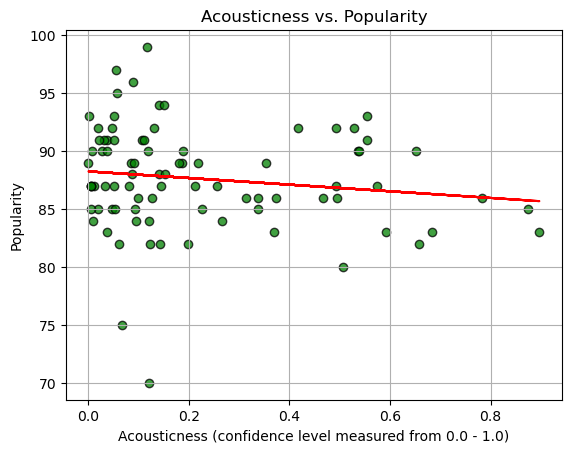

In [15]:
# Acousticness vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker='o', facecolors='g', edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    
# Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
    
# Linear regression on Acousticness vs. Popularity
x = merged_df["acousticness"]
y = merged_df["popularity"]
title = "Acousticness"
xlabel= "Acousticness (confidence level measured from 0.0 - 1.0)"
eq_coordinates = [80,75]
figure = "Acousticness"
RegressionPlot(x, y, title, xlabel, eq_coordinates)

**Acousticness vs. Popularity Analysis:** 

- The correlation between Acousticness & Popularity has an r-value of -0.14561572460395253 

- This suggests a weak negative correlation between Acousticness and Popularity.

- According to the scatter plot, as the acousticness of a track increases, its popularity tends to decrease slightly. 

- As a result, we can conclude, to some extent, that songs with higher acousticness are less popular overall amongst the top 10 artists streamed on Spotify.

- However, the strength of this relationship is considered weak, as other audio features may influence Popularity more significantly.

Definition of Acousticness: The determination of whether a track is considered acoustic is based on the audio characteristics of the recording. Acoustic music typically involves instruments played in a more traditional and natural way, without electronic amplification.

The correlation between Tempo & Popularity is r = -0.05456712264287585


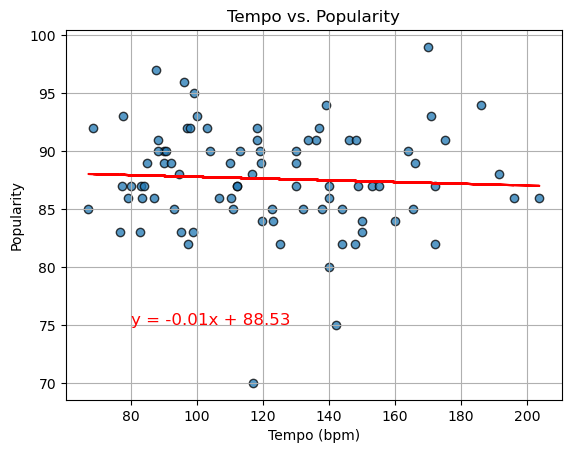

In [16]:
# Tempo vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
    
# Linear regression on Tempo vs. Popularity
x = merged_df["tempo"]
y = merged_df["popularity"]

title = "Tempo"
xlabel= "Tempo (bpm)"
eq_coordinates = [80,75]
figure = "Tempo"

RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

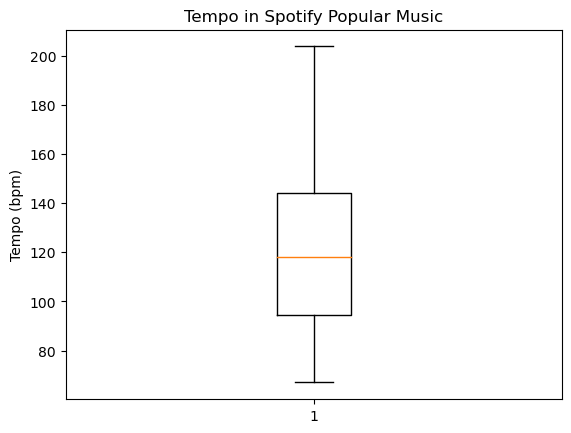

In [17]:
# Tempo vs. Popularity Box Plot

# Define a function to create Boxplots for each audio feature
def BoxPlot(audio_feature, title, ylabel):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{title} in Spotify Popular Music")
    ax1.set_ylabel(ylabel)
    ax1.boxplot(df)

    plt.savefig(f"output_data/Fig_box_{audio_feature}.png")
    plt.show()

# Boxplot for audio_feature (tempo)
audio_feature = "tempo"
title = "Tempo"
ylabel = "Tempo (bpm)"
df = merged_df["tempo"]

BoxPlot(audio_feature, title, ylabel)

**Tempo vs. Popularity Analysis:** R-value = -0.05456712264287585. There appears to be no correlation between Tempo (bpm) and Popularity. Tempo does not appear to affect the popularity of top songs on Spotify.


The correlation between Energy & Popularity is r = 0.006547307498129377


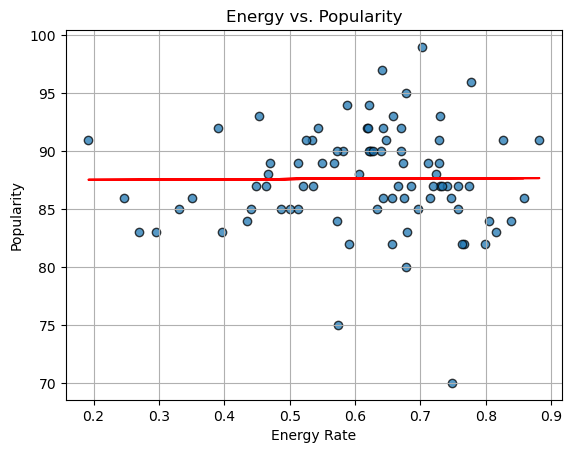

In [18]:
# Energy vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Energy vs. Popularity
x = merged_df["energy"]
y = merged_df["popularity"]
title = "Energy"
xlabel= "Energy Rate"
eq_coordinates = [80,75]
figure = "Energy"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

**Energy vs. Popularity Analysis:** The r value of 0.006547307498129377, meaning that there appears to be no correlation between energy and popularity. Energy does not appear to affect the popularity linearly.

The correlation between Loudness & Popularity is r = -0.07061886953390684


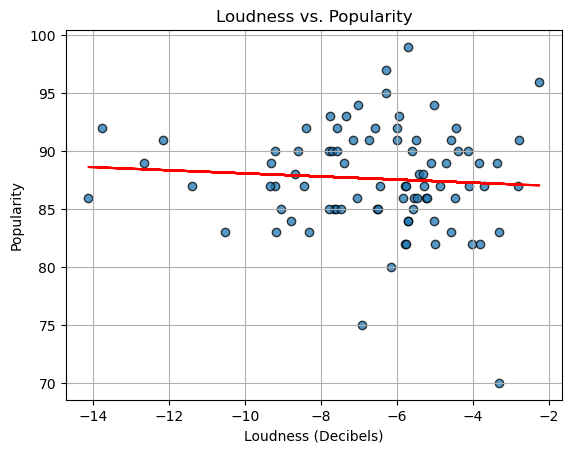

In [19]:
# Loudness vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Loudness vs. Popularity
x = merged_df["loudness"]
y = merged_df["popularity"]
title = "Loudness"
xlabel= "Loudness (Decibels)"
eq_coordinates = [80,75]
figure = "loudness"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

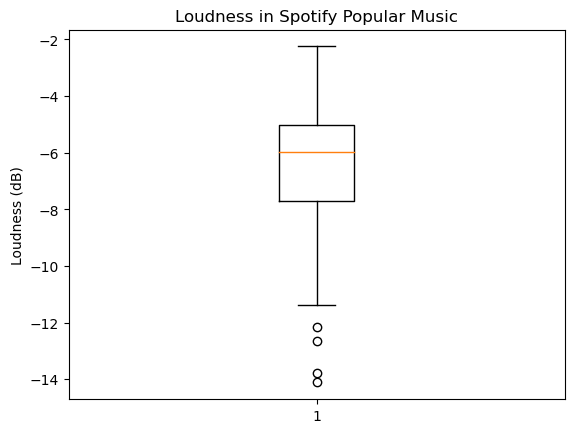

In [20]:
# Loudness vs. Popularity Box Plot

# Define a function to create Boxplots for each audio feature
def BoxPlot(audio_feature, title, ylabel):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{title} in Spotify Popular Music")
    ax1.set_ylabel(ylabel)
    ax1.boxplot(df)

    plt.savefig(f"output_data/Fig_box_{audio_feature}.png")
    plt.show()

# Boxplot for audio_feature (tempo)
audio_feature = "loudness"
title = "Loudness"
ylabel = "Loudness (dB)"
df = merged_df["loudness"]

BoxPlot(audio_feature, title, ylabel)

**Loudness vs. Popularity Analysis:** With an r value of -0.07061886953390684, there appears to be no correlation between loudness (dB) and popularity in the top spotify tracks of 2023. Loudness does not appear to affect the popularity of the top songs on spotify

The correlation between Speechiness & Popularity is r = -0.09878271554088865


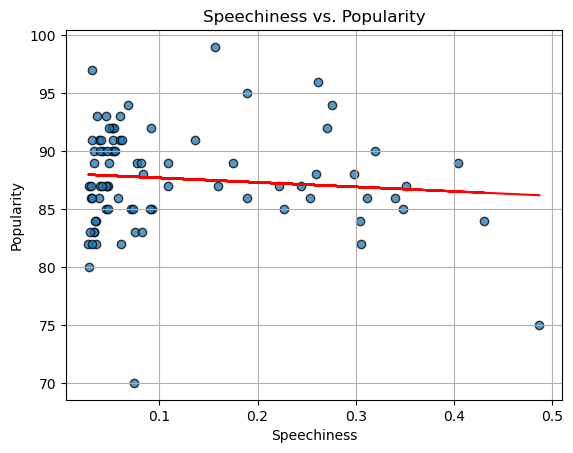

In [21]:
# Speechiness vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Speechiness vs. Popularity
x = merged_df["speechiness"]
y = merged_df["popularity"]
title = "Speechiness"
xlabel= "Speechiness"
eq_coordinates = [80,75]
figure = "Speechiness"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

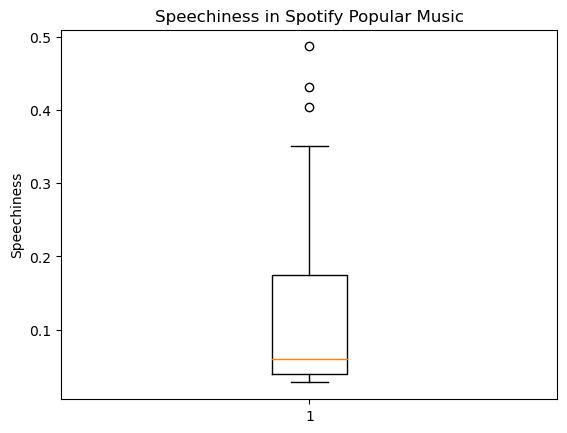

In [22]:
# Speechiness vs. Popularity Box Plot

# Define a function to create Boxplots for each audio feature
def BoxPlot(audio_feature, title, ylabel):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{title} in Spotify Popular Music")
    ax1.set_ylabel(ylabel)
    ax1.boxplot(df)

    plt.savefig(f"output_data/Fig_box_{audio_feature}.png")
    plt.show()

# Boxplot for audio_feature (tempo)
audio_feature = "speechiness"
title = "Speechiness"
ylabel = "Speechiness"
df = merged_df["speechiness"]

BoxPlot(audio_feature, title, ylabel)

The correlation between Danceability & Popularity is r = -0.056385499284621735


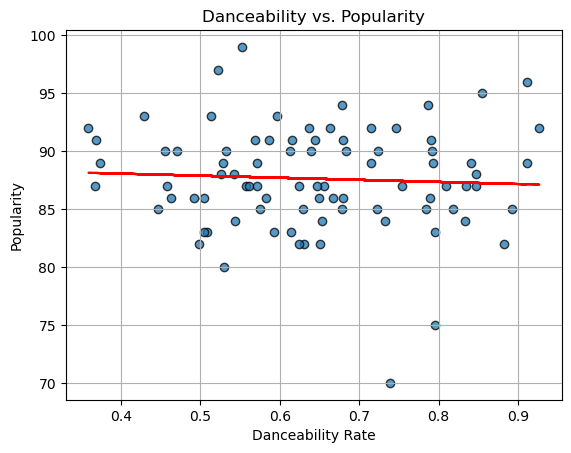

In [23]:
# Danceability vs. Popularity

def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Danceability vs. Popularity
x = merged_df["danceability"]
y = merged_df["popularity"]
title = "Danceability"
xlabel= "Danceability Rate"
eq_coordinates = [80,75]
figure = "Danceability"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

**Danceability vs. Popularity Analysis:** The r value of -0.056385499284621735, meaning that there appears to be no correlation between danceability and popularity. Danceability does not appear to affect the popularity linearly.

The correlation between Valence & Popularity is r = -0.11245273991903829


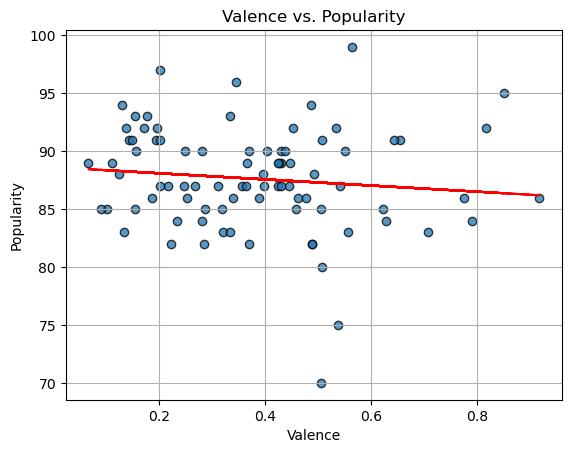

In [24]:
# Valence vs. Popularity

# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Valence vs. Popularity
x = merged_df["valence"]
y = merged_df["popularity"]
title = "Valence"
xlabel= "Valence"
eq_coordinates = [80,75]
figure = "Valence"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

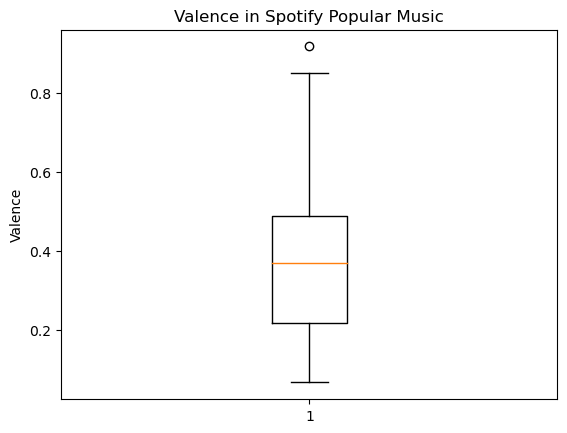

In [25]:
# Valence vs. Popularity Box Plot

# Define a function to create Boxplots for each audio feature
def BoxPlot(audio_feature, title, ylabel):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f"{title} in Spotify Popular Music")
    ax1.set_ylabel(ylabel)
    ax1.boxplot(df)

    plt.savefig(f"output_data/Fig_box_{audio_feature}.png")
    plt.show()

# Boxplot for audio_feature (tempo)
audio_feature = "valence"
title = "Valence"
ylabel = "Valence"
df = merged_df["valence"]

BoxPlot(audio_feature, title, ylabel)

**Speechiness/Valence vs. Popularity Analysis:** Both plots showed weak negative correlations between popularity and the two factors. It appears that valence and speechiness are not significant factors in the relationship with popularity. There might be other factors influencing the popularity score.

In [26]:
# Summary Statistics of Our DataFrame
merged_df.describe()

,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.221524,121.797647,0.615835,-6.539529,0.118189,0.645788,87.623529,0.378007
std,0.228115,32.800815,0.144610,2.370530,0.114498,0.140968,4.485364,0.190866
min,0.000307,67.033000,0.192000,-14.112000,0.027700,0.359000,70.000000,0.066200
25%,0.050400,94.601000,0.534000,-7.694000,0.039900,0.542000,85.000000,0.216000
50%,0.123000,118.051000,0.641000,-5.983000,0.059800,0.639000,87.000000,0.370000
75%,0.353000,143.992000,0.724000,-5.009000,0.175000,0.754000,91.000000,0.489000
max,0.897000,203.759000,0.882000,-2.248000,0.487000,0.927000,99.000000,0.918000
